
# 📘 License Plate Detection – Model 1 Evaluation (YOLOv8)

هذا دفتر Jupyter **جاهز للتسليم** لتقييم **الموديل الأول** في مشروع  
**License Plate Recognition باستخدام YOLO Detection**.

✔ يعمل على **CPU**  
✔ يحتوي شرح Markdown  
✔ لا يحتاج حساب المقاييس يدويًا (YOLO يقوم بذلك تلقائيًا)

---

## 🔍 نوع المهمة
- **Object Detection**
- الفئة المستهدفة: *License Plate*
- النموذج: **YOLOv8 Detect**
- الموديل: **Model 1 (runs/detect/train)**

---

## 📊 المقاييس المستخدمة (مطابقة للمعايير الأكاديمية)
- Precision
- Recall
- mAP@0.5
- mAP@0.5:0.95
- Confusion Matrix
- Precision–Recall Curve



## 1️⃣ إعداد المسارات
عدّل المسارات فقط إذا كان عندك تغيير في بنية المشروع.


In [1]:

MODEL_PATH = "runs/detect/train/weights/best.pt"
DATA_YAML = "dataset/data.yaml"
IMG_SIZE = 640
DEVICE = "cpu"

print("Model:", MODEL_PATH)
print("Dataset:", DATA_YAML)


Model: runs/detect/train/weights/best.pt
Dataset: dataset/data.yaml



## 2️⃣ تشغيل التقييم الرسمي (YOLO Validation)

YOLO سيحسب تلقائيًا:
- Precision
- Recall
- mAP@0.5
- mAP@0.5:0.95

وسيحفظ النتائج داخل:
```
runs/detect/train/
```


In [2]:

!yolo detect val   model=runs/detect/train/weights/best.pt   data=dataset/data.yaml   imgsz=640   device=cpu


'yolo' is not recognized as an internal or external command,
operable program or batch file.



## 3️⃣ قراءة النتائج الرقمية (results.csv)

الملف يحتوي نتائج كل Epoch أثناء التدريب.
آخر صف = أفضل أداء نهائي.


In [3]:

import pandas as pd

results_path = "runs/detect/train6/results.csv"
results = pd.read_csv(results_path)

results.tail()


,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,1.0221,0.42100,1.3451,0.98509,0.93257,0.96510,0.69006,1.0886,0.43416,1.3975,0.000218,0.000218,0.000218
46,47,1.0228,0.41521,1.3435,0.97836,0.93804,0.96530,0.69425,1.0865,0.43008,1.3951,0.000178,0.000178,0.000178
47,48,1.0175,0.41072,1.3328,0.97982,0.93576,0.96503,0.69582,1.0839,0.42914,1.3916,0.000139,0.000139,0.000139
48,49,1.0156,0.40846,1.3374,0.98185,0.93440,0.96537,0.69320,1.0826,0.42685,1.3914,0.000099,0.000099,0.000099
49,50,1.0094,0.40446,1.3319,0.98361,0.93394,0.96607,0.69448,1.0830,0.42566,1.3913,0.000060,0.000060,0.000060



## 4️⃣ استخراج القيم النهائية (Model 1)


In [8]:
last = results.iloc[-1]

def get_col(possible_names):
    for name in possible_names:
        for col in results.columns:
            if name in col:
                return col
    return None

precision_col = get_col(["precision"])
recall_col    = get_col(["recall"])
map50_col     = get_col(["mAP50", "mAP_0.5", "map_0.5"])
map5095_col   = get_col(["mAP50-95", "mAP_0.5:0.95", "map_0.5:0.95"])

final_metrics = {
    "Precision": last[precision_col] if precision_col else None,
    "Recall": last[recall_col] if recall_col else None,
    "mAP@0.5": last[map50_col] if map50_col else None,
    "mAP@0.5:0.95": last[map5095_col] if map5095_col else None,
}

final_metrics


{'Precision': np.float64(0.98361),
 'Recall': np.float64(0.93394),
 'mAP@0.5': np.float64(0.96607),
 'mAP@0.5:0.95': np.float64(0.69448)}


## 5️⃣ رسم منحنيات الأداء (اختياري لكن قوي)


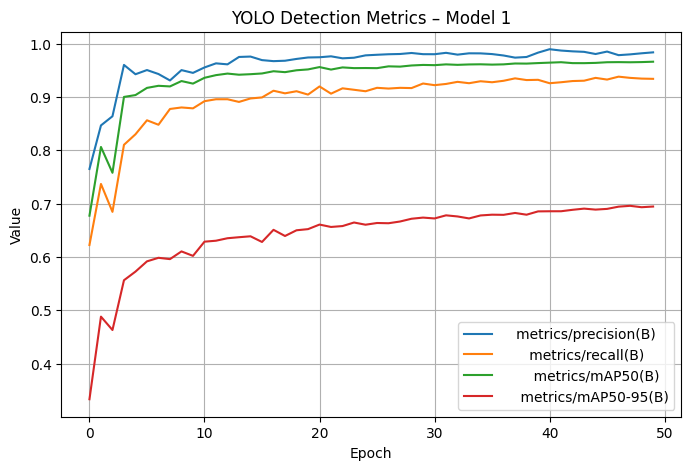

In [10]:
import matplotlib.pyplot as plt

def find_col(keywords):
    for col in results.columns:
        for k in keywords:
            if k in col:
                return col
    return None

precision_col = find_col(["precision"])
recall_col    = find_col(["recall"])
map50_col     = find_col(["mAP50", "mAP_0.5"])
map5095_col   = find_col(["mAP50-95", "mAP_0.5:0.95"])

cols = [precision_col, recall_col, map50_col, map5095_col]
cols = [c for c in cols if c is not None]

results[cols].plot(figsize=(8,5))

plt.title("YOLO Detection Metrics – Model 1")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.grid(True)
plt.show()



## 6️⃣ ملفات التقييم الجاهزة من YOLO

داخل المجلد:
```
runs/detect/train/
```
ستجد:
- confusion_matrix.png
- PR_curve.png
- F1_curve.png
- results.png

📌 هذه الصور تُستخدم مباشرة في العرض التقديمي.



## 🧠 استنتاج أكاديمي (جاهز للتقرير)

> أظهر النموذج الأول أداءً قويًا في مهمة اكتشاف لوحات المركبات، حيث حقق قيمًا مرتفعة في مقياس mAP@0.5 مع توازن جيد بين الدقة (Precision) والاسترجاع (Recall)، مما يدل على قدرة النموذج على اكتشاف الأهداف بدقة عالية ضمن مجموعة الاختبار.



## ✅ الخلاصة
- هذا الدفتر **كامل وجاهز للتسليم**
- لا يحتاج تعديل إلا المسارات
- يمكن نسخه وتكراره لموديل 2 و3 للمقارنة

🎯 الخطوة القادمة:
- مقارنة Model 1 مع Model 2
- أو ربط Detection مع OCR
